In [2]:
import pandas as pd 
import numpy as np 

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

a. Compute and display the number of classes.

In [5]:
len(np.unique(y_train))

10

b. Compute and display the dimensions of each image.

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train[0].shape

(28, 28)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
def show (x_train,y_train,i):
    plt.figure(figsize=(3,3))
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

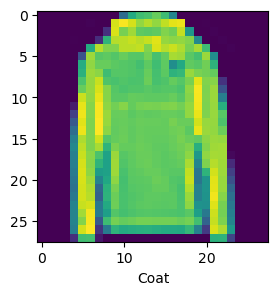

In [10]:
show(x_train,y_train,24)

d. Perform normalization

In [13]:
x_train=x_train/255

In [14]:
x_train.max()

0.00392156862745098

Q2) Performing experiments on Fully Connected Neural Networks (FCNN): 
a. Design a FCNN which is most suitable for the given dataset:  
Experimentally choose the best network (the intuitions and learnings from the experiments you 
have performed in Week-1 and Week-2 will help you choose the hyperparameters for the 
network).. 


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [20]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(1000,activation='relu'),
    Dense(500,activation='relu'),
    Dense(200,activation='relu'),
    Dense(10,activation='softmax'),

])

In [21]:
# Use categorical_crossentropy for one-hot encoded labels.
# Use sparse_categorical_crossentropy for integer-encoded labels.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.6636 - loss: 0.8910
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8313 - loss: 0.4536
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8533 - loss: 0.3935


In [23]:
b=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7476 - loss: 18365.9707


In [24]:
b

[19820.52734375, 0.7390999794006348]

In [25]:
x_test[1].shape

(28, 28)

In [100]:
single_input = np.expand_dims(x_train[515], axis=0)
prediction = np.argmax(model.predict(single_input))
print(class_names[prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Trouser


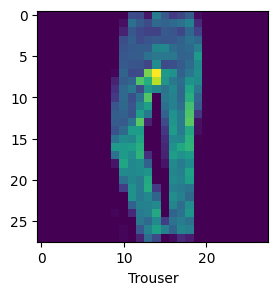

In [101]:
show(x_train,y_train,515)